In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix 
import time 

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Program Start time
program_start_time = time.time()

In [3]:
np.random.seed(42)
df1 = pd.read_csv('E:\ML\Assignment 1\churn.csv')

In [4]:
unique_values = {}
for col in df1.columns:
    unique_values[col] = df1[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
customer_id,4250
state,51
account_length,215
area_code,3
international_plan,2
voice_mail_plan,2
number_vmail_messages,46
total_day_minutes,1843
total_day_calls,120
total_day_charge,1843


In [5]:
df1['area_code'] = df1['area_code'].replace({'area_code_510': 0, 'area_code_415': 1, 'area_code_408': 2})

C:\Users\cheng\AppData\Local\Temp\ipykernel_38196\4143876758.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['area_code'] = df1['area_code'].replace({'area_code_510': 0, 'area_code_415': 1, 'area_code_408': 2})


In [6]:
columns_1 = ['international_plan','voice_mail_plan','churn']
for col in columns_1:
    df1[col] = df1[col].astype(int)

In [7]:
df1 = df1.drop(columns=['customer_id','state'])

<Axes: title={'center': 'Correlation with Churn Column'}>

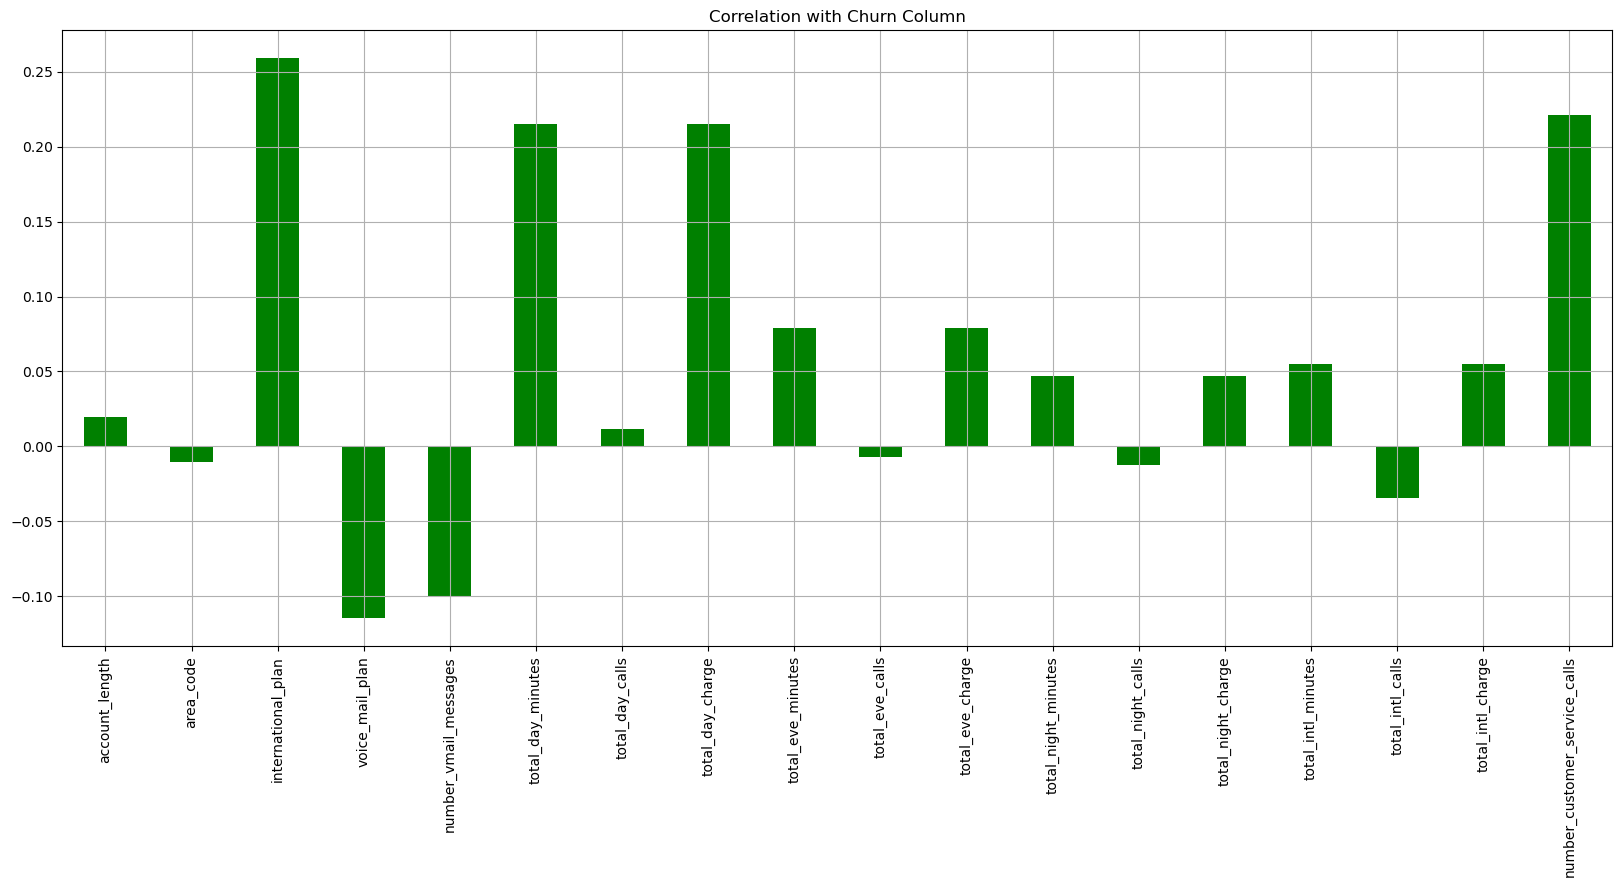

In [8]:
df1.drop('churn', axis=1).corrwith(df1.churn).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Churn Column", color='green')

array([[<Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'area_code'}>,
        <Axes: title={'center': 'international_plan'}>,
        <Axes: title={'center': 'voice_mail_plan'}>],
       [<Axes: title={'center': 'number_vmail_messages'}>,
        <Axes: title={'center': 'total_day_minutes'}>,
        <Axes: title={'center': 'total_day_calls'}>,
        <Axes: title={'center': 'total_day_charge'}>],
       [<Axes: title={'center': 'total_eve_minutes'}>,
        <Axes: title={'center': 'total_eve_calls'}>,
        <Axes: title={'center': 'total_eve_charge'}>,
        <Axes: title={'center': 'total_night_minutes'}>],
       [<Axes: title={'center': 'total_night_calls'}>,
        <Axes: title={'center': 'total_night_charge'}>,
        <Axes: title={'center': 'total_intl_minutes'}>,
        <Axes: title={'center': 'total_intl_calls'}>],
       [<Axes: title={'center': 'total_intl_charge'}>,
        <Axes: title={'center': 'number_customer_service_calls'}>,
     

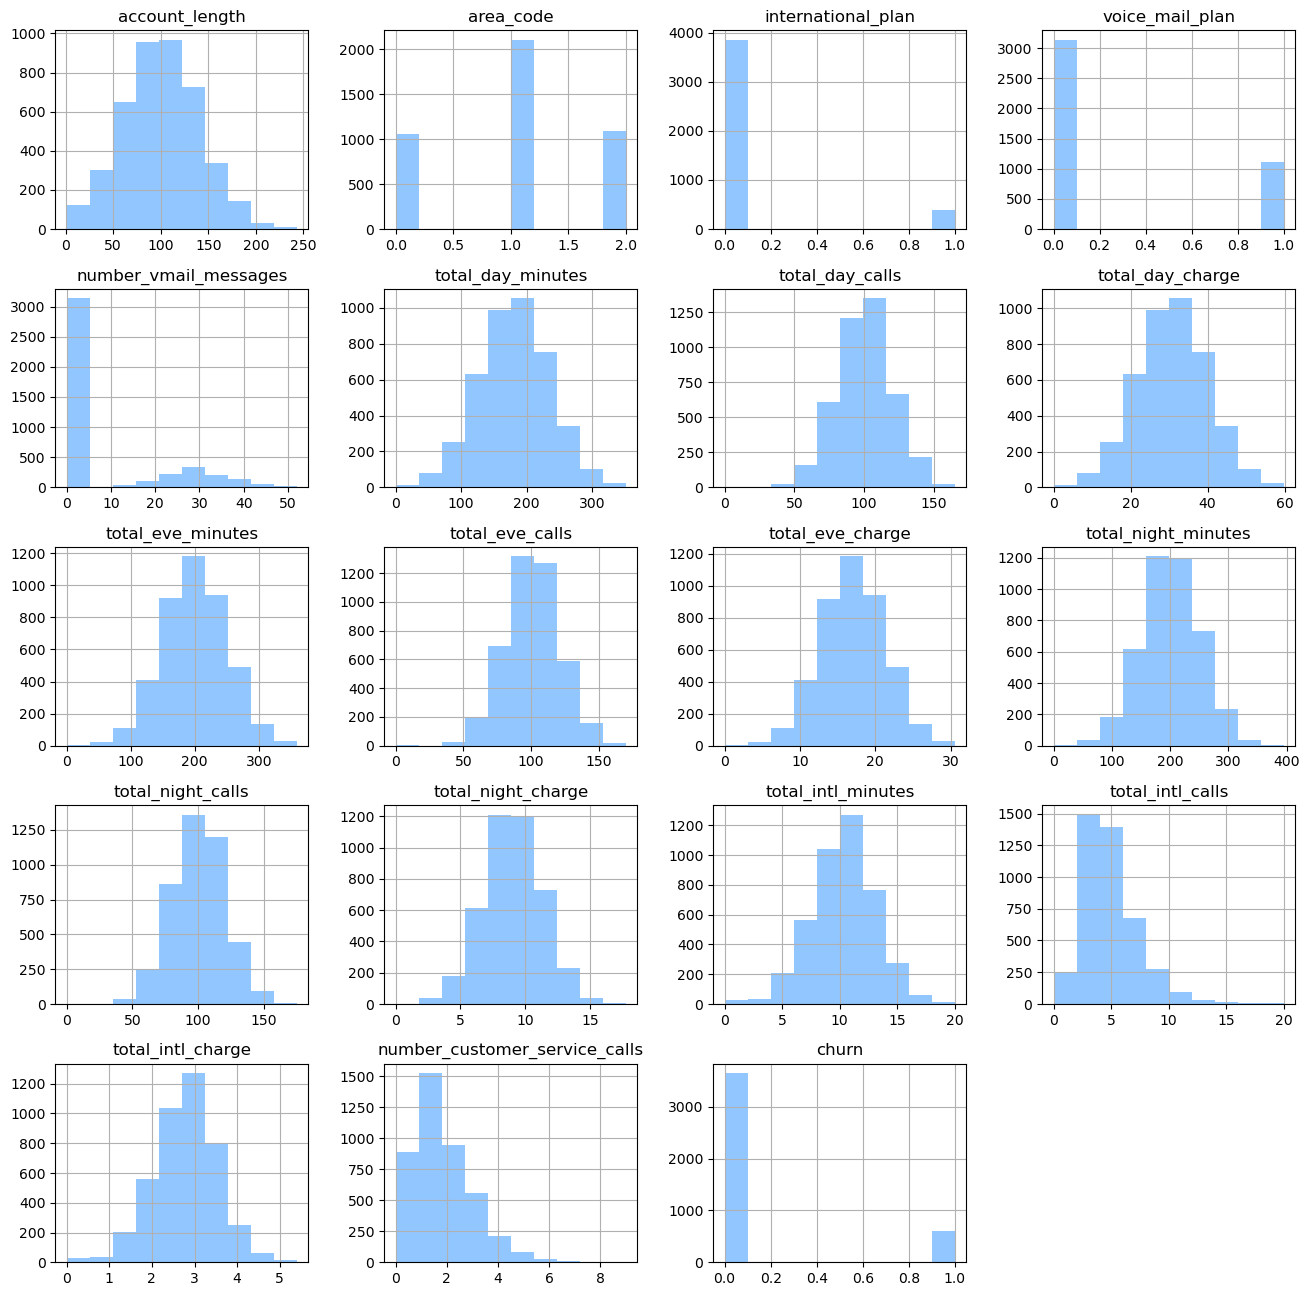

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.size'] = 10
df1.hist(figsize=(16, 16))

In [10]:
df1["churn"].value_counts()

churn
0    3652
1     598
Name: count, dtype: int64

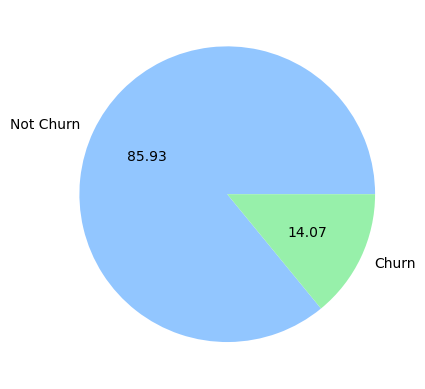

In [11]:
labels=['Not Churn', 'Churn']
plt.pie(df1["churn"].value_counts() ,labels=labels, autopct='%.02f' );

In [12]:
churn_df = df1[df1.churn == 1]
NotChurn_df = df1[df1.churn == 0]

In [13]:
churn_df.shape

(598, 19)

In [14]:
NotChurn_df.shape

(3652, 19)

In [15]:
NotChurn_sample = NotChurn_df.sample(n=598, random_state=42)

In [16]:
new_dataset = pd.concat([NotChurn_sample,churn_df], axis = 0 )

# Feature Scaling 

In [17]:
new_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,1196.0,101.112876,39.949233,1.00,75.0000,100.00,126.2500,232.00
area_code,1196.0,1.002508,0.712702,0.00,0.0000,1.00,2.0000,2.00
international_plan,1196.0,0.169732,0.375555,0.00,0.0000,0.00,0.0000,1.00
voice_mail_plan,1196.0,0.204013,0.403147,0.00,0.0000,0.00,0.0000,1.00
number_vmail_messages,1196.0,6.055184,12.446584,0.00,0.0000,0.00,0.0000,50.00
total_day_minutes,1196.0,191.559950,62.683905,0.00,144.4500,190.05,237.5750,351.50
total_day_calls,1196.0,100.271739,20.296189,0.00,87.0000,100.00,113.0000,165.00
total_day_charge,1196.0,32.565619,10.656374,0.00,24.5600,32.31,40.3925,59.76
total_eve_minutes,1196.0,204.414967,50.604822,48.10,169.7500,205.60,238.8750,349.40
total_eve_calls,1196.0,99.738294,19.433291,36.00,87.0000,100.00,113.0000,169.00


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_dataset[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 
     'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
     'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']] = scaler.fit_transform(new_dataset[['account_length', 
                                                                                                                         'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 
                                                                                                                        'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
                                                                                                                          'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']])

In [19]:
# the feature values fall between 0 and 1 after being rescaled
new_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,1196.0,0.433389,0.172940,0.0,0.320346,0.428571,0.542208,1.0
area_code,1196.0,1.002508,0.712702,0.0,0.000000,1.000000,2.000000,2.0
international_plan,1196.0,0.169732,0.375555,0.0,0.000000,0.000000,0.000000,1.0
voice_mail_plan,1196.0,0.204013,0.403147,0.0,0.000000,0.000000,0.000000,1.0
number_vmail_messages,1196.0,0.121104,0.248932,0.0,0.000000,0.000000,0.000000,1.0
total_day_minutes,1196.0,0.544979,0.178333,0.0,0.410953,0.540683,0.675889,1.0
total_day_calls,1196.0,0.607708,0.123007,0.0,0.527273,0.606061,0.684848,1.0
total_day_charge,1196.0,0.544940,0.178320,0.0,0.410977,0.540663,0.675912,1.0
total_eve_minutes,1196.0,0.518802,0.167955,0.0,0.403750,0.522735,0.633173,1.0
total_eve_calls,1196.0,0.479235,0.146115,0.0,0.383459,0.481203,0.578947,1.0


array([[<Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'area_code'}>,
        <Axes: title={'center': 'international_plan'}>,
        <Axes: title={'center': 'voice_mail_plan'}>],
       [<Axes: title={'center': 'number_vmail_messages'}>,
        <Axes: title={'center': 'total_day_minutes'}>,
        <Axes: title={'center': 'total_day_calls'}>,
        <Axes: title={'center': 'total_day_charge'}>],
       [<Axes: title={'center': 'total_eve_minutes'}>,
        <Axes: title={'center': 'total_eve_calls'}>,
        <Axes: title={'center': 'total_eve_charge'}>,
        <Axes: title={'center': 'total_night_minutes'}>],
       [<Axes: title={'center': 'total_night_calls'}>,
        <Axes: title={'center': 'total_night_charge'}>,
        <Axes: title={'center': 'total_intl_minutes'}>,
        <Axes: title={'center': 'total_intl_calls'}>],
       [<Axes: title={'center': 'total_intl_charge'}>,
        <Axes: title={'center': 'number_customer_service_calls'}>,
     

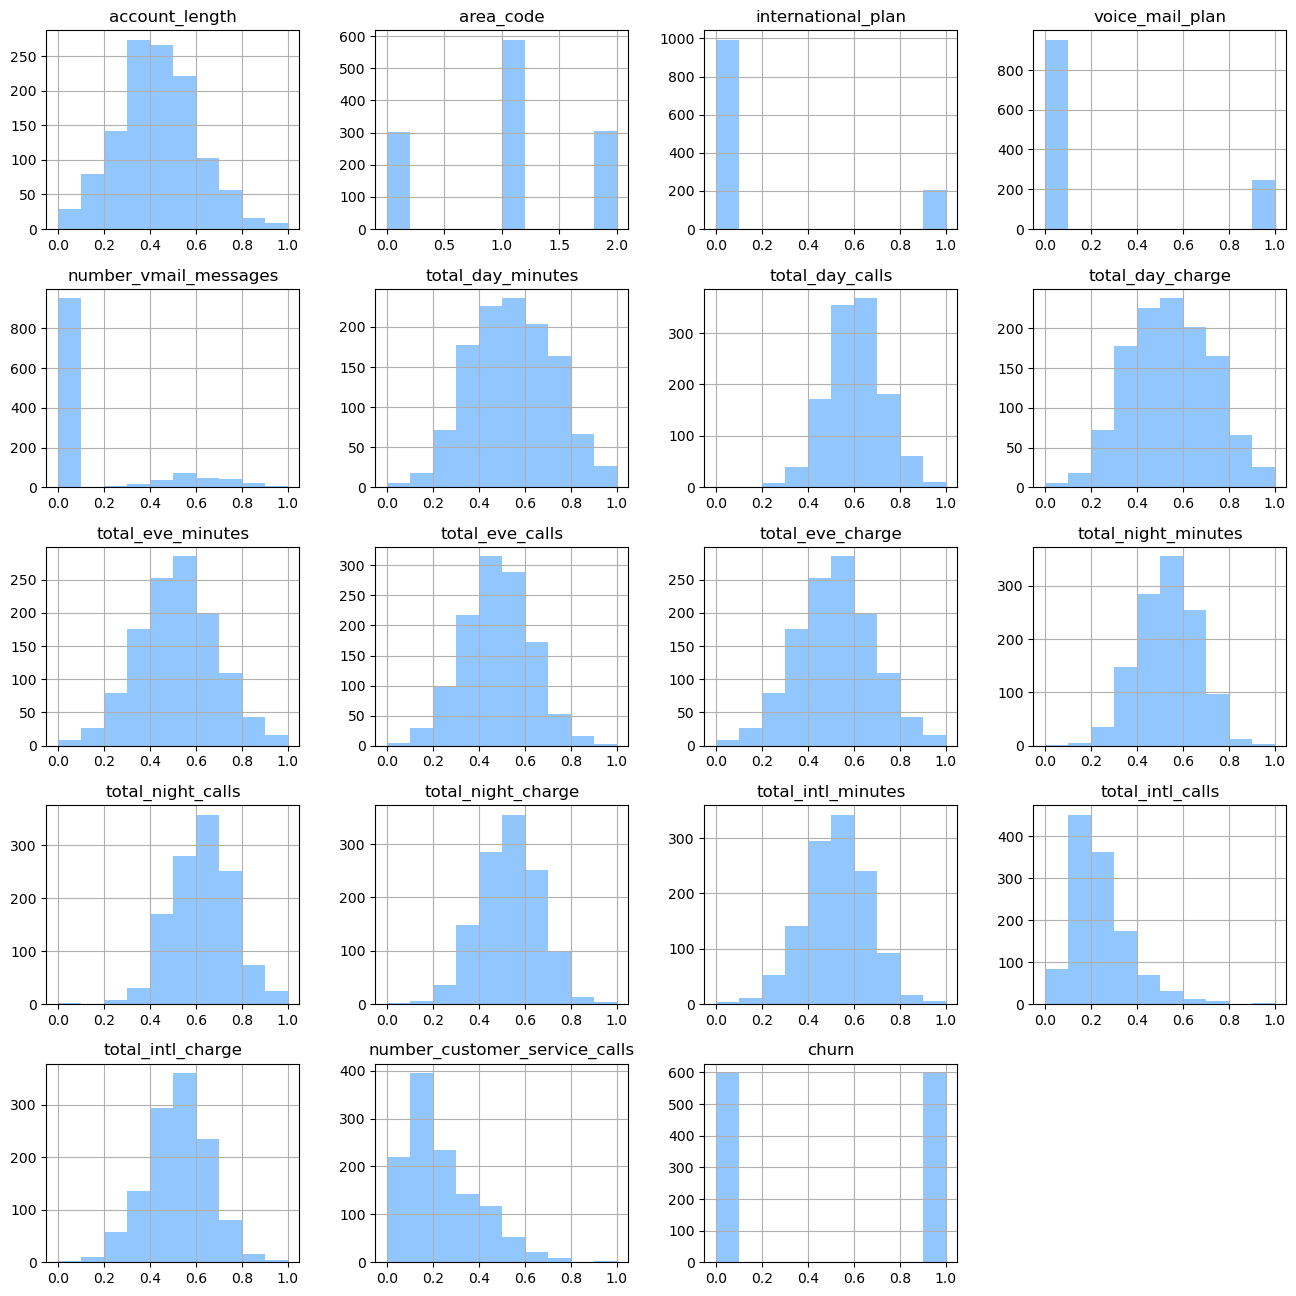

In [20]:
plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.size'] = 10
new_dataset.hist(figsize=(16, 16))

# Data Splitting and Resampling

In [21]:
from sklearn.model_selection import learning_curve, train_test_split
X = new_dataset.drop('churn',axis=1)   
y = new_dataset['churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=188, stratify=y)

# Model Fitting - KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

In [23]:
# define a cross validation function using recall as performance metric for all models
from sklearn.model_selection import cross_validate

def cross_validation(clf_model, X_train, y_train, cv):
    # Use cross_validate to calculate recall
    scores = cross_validate(clf_model, X_train, y_train,
                            scoring=['recall'], cv=cv)
    
    # Calculate the mean of the recall
    mean_recall = np.mean(scores['test_recall'])
    
    return mean_recall

In [24]:
# using cross validation to find best K for the KNN model
k_values = np.array(range(1, 16))

df1_KNN_CV = {}
for k in k_values:
    models = {
        "K-Nearest Neighbour{}".format(k): KNeighborsClassifier(n_neighbors= k, metric='manhattan', algorithm='auto')}
    for model_name, model in models.items():
        df1_KNN_CV[model_name] = cross_validation(model, X_train, y_train, 5)

In [25]:
df1_KNN_CV = pd.DataFrame.from_dict(df1_KNN_CV, orient='index', columns=['Recall'])

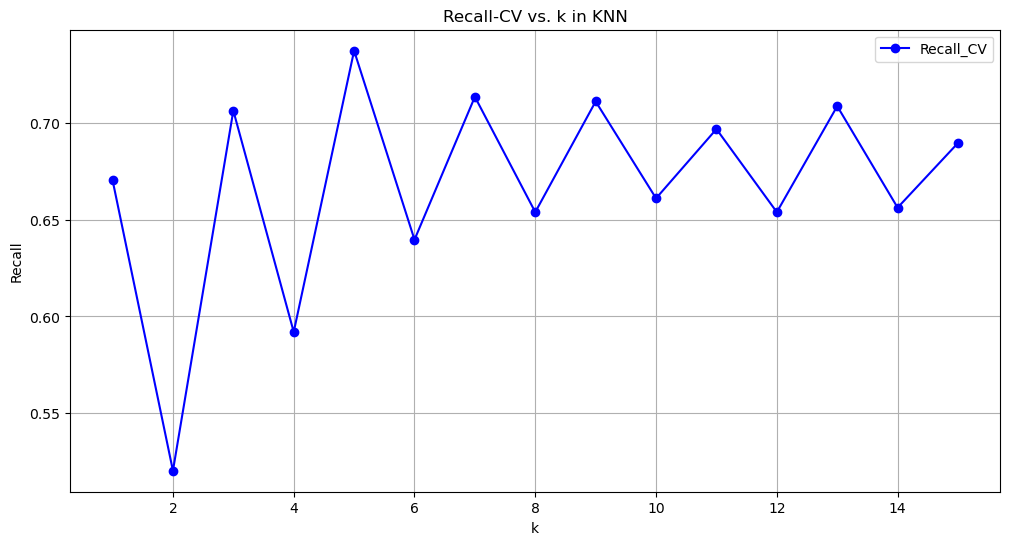

In [26]:
# plot the cross validation recall against K   
plt.figure(figsize=(12, 6))
plt.plot(k_values, df1_KNN_CV["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('k')
plt.ylabel('Recall')
plt.title('Recall-CV vs. k in KNN')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # fit the model and calculate fit time 
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    fit_time_KNN = end_time - start_time
    print('KNN_model fit time: ',  fit_time_KNN)
    
    # make predictions and calculate predict time 
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    predict_time_KNN = end_time - start_time
    print('KNN_model predict time: ',  predict_time_KNN)
    
    recall = recall_score(y_test, y_pred)
    
    return recall

In [28]:
KNN_model = KNeighborsClassifier(n_neighbors= 7, metric='manhattan', algorithm='auto')

In [29]:
KNN_recall = evaluate_model(KNN_model, X_train, X_test, y_train, y_test)
KNN_recall

KNN_model fit time:  0.0010030269622802734
KNN_model predict time:  0.013997077941894531


0.776536312849162

In [30]:
pred_KNN = KNN_model.predict(X_test)

In [31]:
cm_KNN = confusion_matrix(y_test,pred_KNN )
cm_KNN

array([[153,  27],
       [ 40, 139]], dtype=int64)

In [32]:
# Compute learning curves
def plot_learning_curves(model_name,X_train, y_train):
    sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(model_name, X_train, y_train, train_sizes= sizes, cv=5, scoring='recall', n_jobs=-1)

    # Calculate the mean and standard deviation of the training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score-CV')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Validation score-CV')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='green')

    titles = "{}.Learning Curves".format(model_name) 
    
    plt.title(titles)
    plt.xlabel('Training Set Size')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.show()

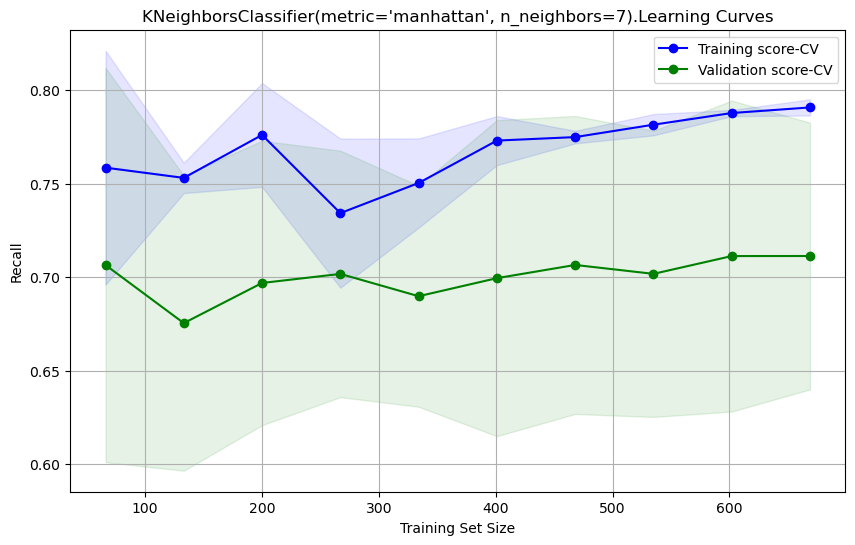

In [33]:
plot_learning_curves(KNN_model,X_train, y_train)

# Neural Network Model 

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import StratifiedKFold

In [35]:
tf.random.set_seed(88)

In [36]:
## using cross validation find the best number of neurons in the first hidden layer 
ANN_Neurons_HL1 = {}
neuron_num_hl1 = np.array([50, 60, 70, 80, 90, 100])

# Create a stratified K-Fold object for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for num in neuron_num_hl1:
    cv_recall_scores = []  # To store recall for each fold
    
    for train_idx, val_idx in kfold.split(X_train, y_train):
        # Split the data
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Define the model
        model = Sequential([
            Input(shape=(X_train.shape[1],)),   
            Dense(num, activation='relu'),
            Dense(5, activation='relu'), 
            Dense(1, activation='sigmoid')  # Output layer for binary classification
        ])

        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.01),
                      loss='binary_crossentropy',
                      metrics=['recall'])

        # Train the model
        model.fit(X_cv_train, y_cv_train, batch_size=30, epochs=40, verbose=0, shuffle=False)
        
        # Evaluate the model on the validation data
        loss, recall = model.evaluate(X_cv_val, y_cv_val, verbose=0)
        
        # Store recall score for this fold
        cv_recall_scores.append(recall)
    
    # Calculate the average recall across all folds
    mean_recall = np.mean(cv_recall_scores)
    
    # Store the mean recall score for this configuration
    model_name = "ANN-Neuron-HL1={}".format(num)
    ANN_Neurons_HL1[model_name] = mean_recall

In [37]:
ANN_Neurons_HL1 = pd.DataFrame.from_dict( ANN_Neurons_HL1, orient='index', columns=['Recall'])

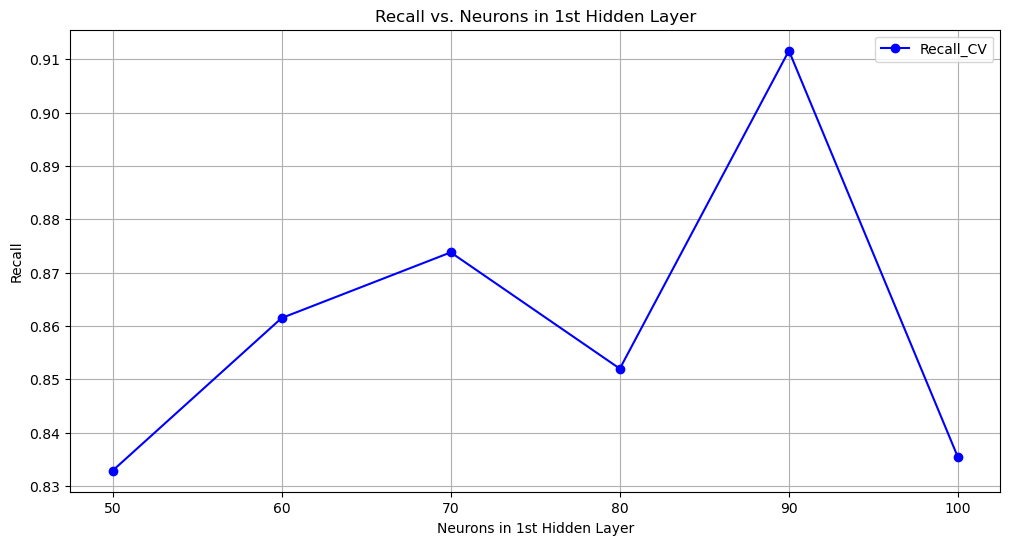

In [38]:
# plot CV recall against number of neurons in 1st Hidden Layer
plt.figure(figsize=(12, 6))
plt.plot(neuron_num_hl1,  ANN_Neurons_HL1["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Neurons in 1st Hidden Layer')
plt.ylabel('Recall')
plt.title('Recall vs. Neurons in 1st Hidden Layer')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
## using cross validation to find the best best number of neorons in the second hidden layer
ANN_Neurons_HL2 = {}
neuron_num_hl2 = np.array([5, 10, 20, 30, 40, 50, 60, 80])
                          
# Create a stratified K-Fold object for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for num_hl2 in neuron_num_hl2:
    cv_recall_scores = []  # To store recall for each fold
    
    for train_idx, val_idx in kfold.split(X_train, y_train):
        # Split the data
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    # Define the model
    model = Sequential([
        Input(shape=(X_train.shape[1],)),   
        Dense(60, activation='relu'),
        Dense(num, activation='relu'), 
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['recall'])
    
    # Train the model
    model.fit(X_train, y_train, batch_size=30, epochs=40, validation_split=0.3, verbose=0, shuffle=False)
    
    # Evaluate the model on the validation data
    loss, recall = model.evaluate(X_cv_val, y_cv_val, verbose=0)
        
    # Store recall score for this fold
    cv_recall_scores.append(recall)
    
    # Calculate the average recall across all folds
    mean_recall = np.mean(cv_recall_scores)
                          
   # Store the mean recall score for this configuration
    model_name = "ANN-Neuron-HL2={}".format(num_hl2)
    ANN_Neurons_HL2[model_name] = mean_recall

In [40]:
ANN_Neurons_HL2 = pd.DataFrame.from_dict( ANN_Neurons_HL2, orient='index', columns=['Recall'])

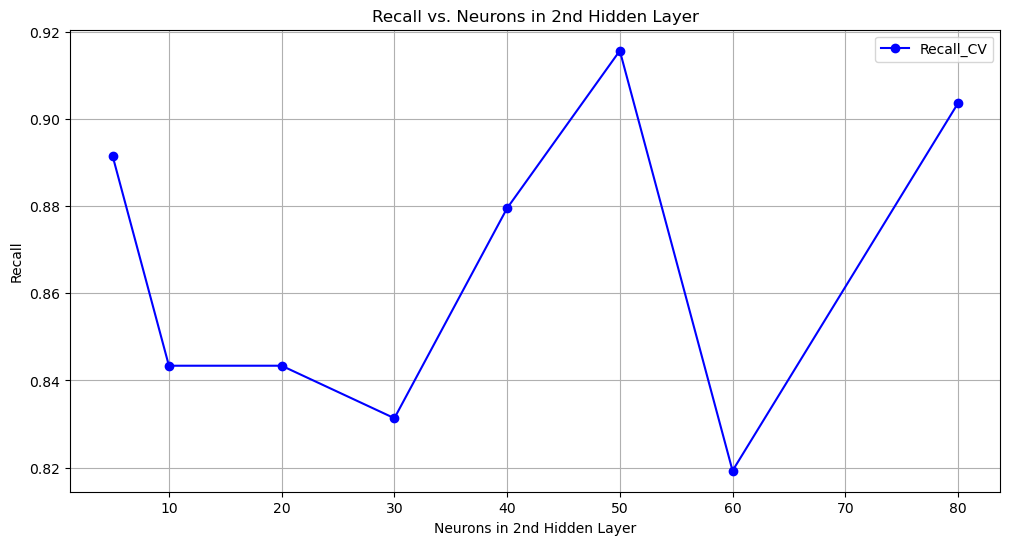

In [41]:
# plot CV recall against number of neurons in 2nd Hidden Layer
plt.figure(figsize=(12, 6))
plt.plot(neuron_num_hl2,  ANN_Neurons_HL2["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Neurons in 2nd Hidden Layer')
plt.ylabel('Recall')
plt.title('Recall vs. Neurons in 2nd Hidden Layer')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
## using cross validation to find the best learning rate
ANN_LR = {}
lr_values = np.array([0.0005,0.001, 0.002, 0.003,0.004, 0.005, 0.006, 0.008, 0.01, 0.02,0.03])

# Create a stratified K-Fold object for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for lr in lr_values:
    cv_recall_scores = []  # To store recall for each fold
    
    for train_idx, val_idx in kfold.split(X_train, y_train):
        # Split the data
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
    # Define the model
    model = Sequential([
        Input(shape=(X_train.shape[1],)),   
        Dense(60, activation='relu'),
        Dense(5, activation='relu'), 
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['recall'])
    
    # Train the model
    model.fit(X_train, y_train, batch_size=30, epochs=40, validation_split=0.3, verbose=0, shuffle=False)
    
    # Evaluate the model on the validation data
    loss, recall = model.evaluate(X_cv_val, y_cv_val, verbose=0)
        
    # Store recall score for this fold
    cv_recall_scores.append(recall)
    
    # Calculate the average recall across all folds
    mean_recall = np.mean(cv_recall_scores)
                          
   # Store the mean recall score for this configuration
    model_name = "ANN-LR={}".format(lr)
    ANN_LR[model_name] = mean_recall

In [43]:
ANN_LR = pd.DataFrame.from_dict( ANN_LR, orient='index', columns=['Recall'])

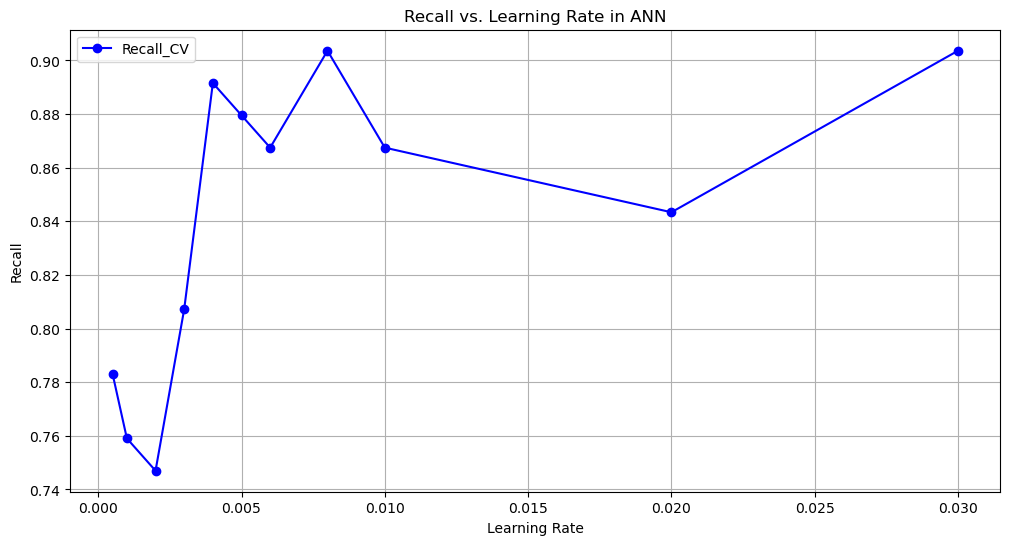

In [44]:
# plot CV recall against Learning Rate in ANN
plt.figure(figsize=(12, 6))
plt.plot(lr_values,  ANN_LR["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Learning Rate')
plt.ylabel('Recall')
plt.title('Recall vs. Learning Rate in ANN')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
## Build a best ANN model using the best values we found for the hyperparameters
ANN_model = Sequential([
        Input(shape=(X_train.shape[1],)),   
        Dense(60, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

ANN_model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['recall'])

In [46]:
# fit the ANN model and calculate fit time
start_time = time.time()
history = ANN_model.fit(X_train, y_train, batch_size = 30, epochs = 30, validation_split=0.3, verbose = 0, shuffle = False)
end_time = time.time() 
fit_time_ANN = end_time - start_time
print('ANN_model fit time: ', fit_time_ANN)

ANN_model fit time:  1.9945225715637207


In [47]:
#make predictions with ANN and calculate the predict time
start_time = time.time()
pred_binary = np.where(ANN_model.predict(X_test) > 0.5, 1, 0)
end_time = time.time() 
predict_time_ANN = end_time - start_time
print('ANN_model predict time: ', predict_time_ANN)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ANN_model predict time:  0.08745956420898438


In [48]:
loss, recall = ANN_model.evaluate(X_test,y_test)
print(f'Test recall: {recall:.2f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.6931 - recall: 1.0000
Test recall: 1.00


In [49]:
ANN_result = pd.DataFrame(history.history)

In [50]:
np.unique(pred_binary)

array([1])

In [51]:
pred_binary = pd.DataFrame(pred_binary)
pred_binary.value_counts()

0
1    359
Name: count, dtype: int64

In [52]:
cm_ann = confusion_matrix(y_test, pred_binary)
cm_ann

array([[  0, 180],
       [  0, 179]], dtype=int64)

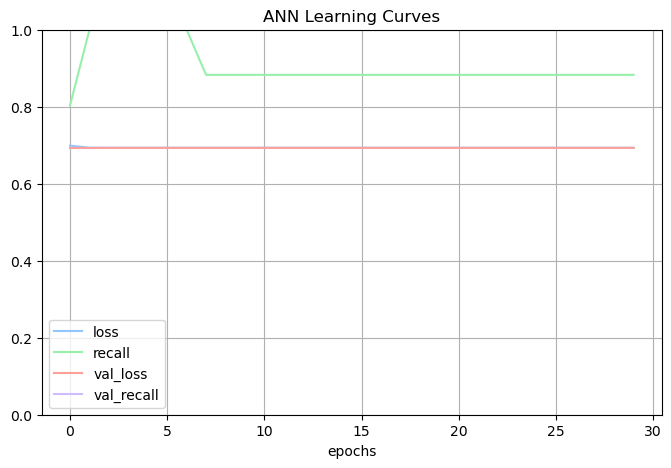

In [53]:
# Plot the recall and loss against iterations 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title('ANN Learning Curves')
plt.xlabel('epochs')
plt.legend(loc='best')
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

# SVM Model

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

In [55]:
## using cross validation to find the best cost value in SVM with RBF kernel 
SVM_RBF_C = {}
cost_values = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
for cost in cost_values:
    models = {
        "SVM-RBF-C={}".format(cost): SVC(C=cost, kernel='rbf', gamma=0.3)}
    for model_name, model in models.items():
        SVM_RBF_C[model_name] = cross_validation(model, X_train, y_train, 3)

In [56]:
SVM_RBF_C = pd.DataFrame.from_dict(SVM_RBF_C, orient='index', columns=['Recall'])

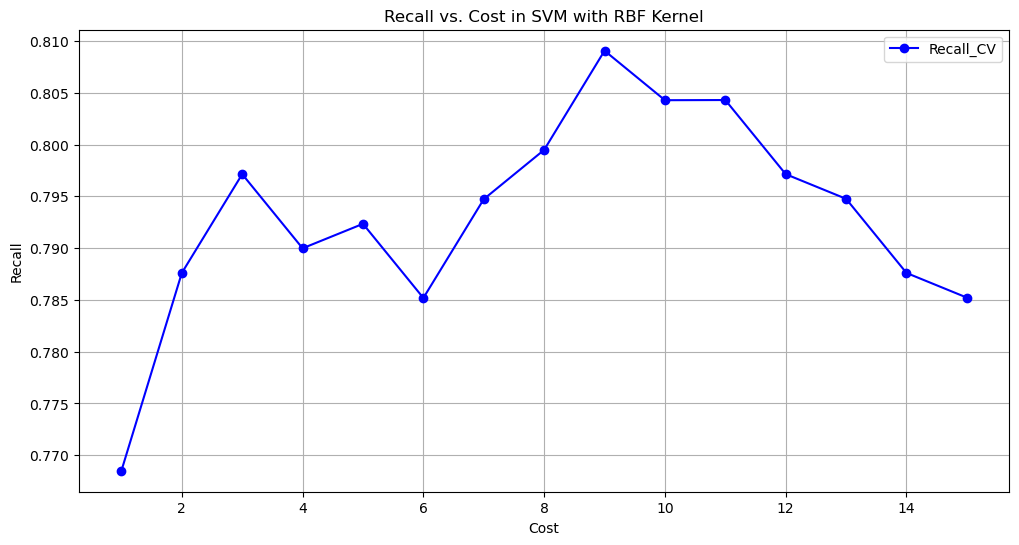

In [57]:
## plot the cross validation recall against cost in SVM with RBF kernel  
plt.figure(figsize=(12, 6))
plt.plot(cost_values, SVM_RBF_C["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Cost')
plt.ylabel('Recall')
plt.title('Recall vs. Cost in SVM with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
## using cross validation to find the best gamma in SVM with RBF kernel 
SVM_RBF_G = {}
gamma_values = np.array([0.01, 0.02,0.03,0.04, 0.05,0.1,0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1])
for g in gamma_values:
    models = {
        "SVM-RBF-G={}".format(g): SVC(C=9, kernel='rbf', gamma=g)}
    for model_name, model in models.items():
        SVM_RBF_G[model_name] = cross_validation(model, X_train, y_train, 3)

In [59]:
SVM_RBF_G = pd.DataFrame.from_dict(SVM_RBF_G, orient='index', columns=['Recall'])

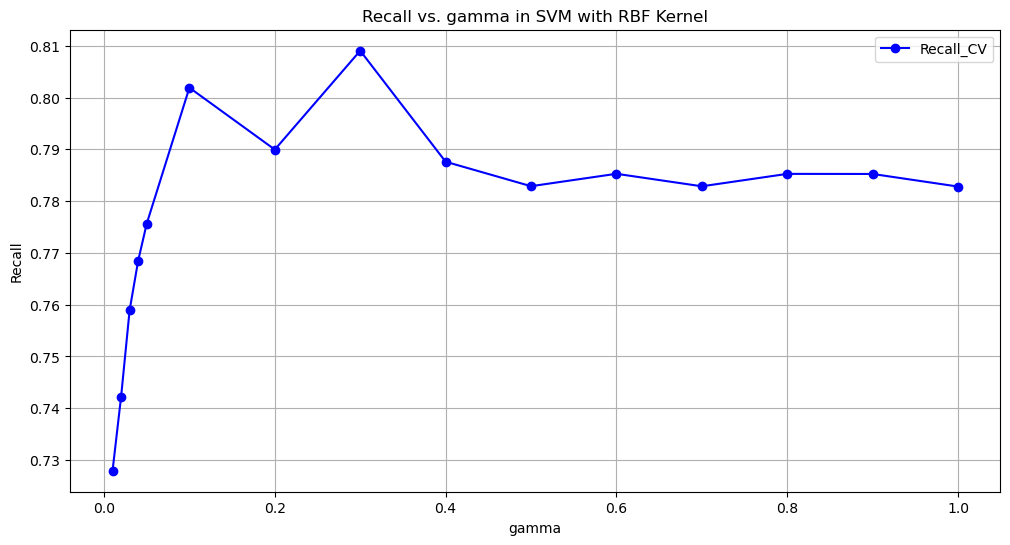

In [60]:
## plot the cross validation recall against gamma in SVM with RBF kernel 
plt.figure(figsize=(12, 6))
plt.plot(gamma_values, SVM_RBF_G["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('gamma')
plt.ylabel('Recall')
plt.title('Recall vs. gamma in SVM with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# fit the SVM model with the best cost value and gamma value found through cross validation and calculate fit time
best_SVM_RBF = SVC(C=11, kernel='rbf', gamma=0.3)

start_time = time.time()
best_SVM_RBF.fit(X_train, y_train)
end_time = time.time() 
fit_time_SVM_RBF = end_time - start_time
print('SVM with RBF kernel fit time: ', fit_time_SVM_RBF)

SVM with RBF kernel fit time:  0.014544486999511719


In [77]:
# make predictions using SVM with RBF kernel and calculate predict time  
start_time = time.time()
pred_SVM = best_SVM_RBF.predict(X_test)
end_time = time.time() 
predict_time_SVM_RBF = end_time - start_time
print('SVM with RBF kernel predict time: ', predict_time_SVM_RBF)

SVM with RBF kernel predict time:  0.013718843460083008


In [78]:
# calculate recall
SVM_RBF_recall = recall_score(y_test, pred_SVM)
SVM_RBF_recall

0.8268156424581006

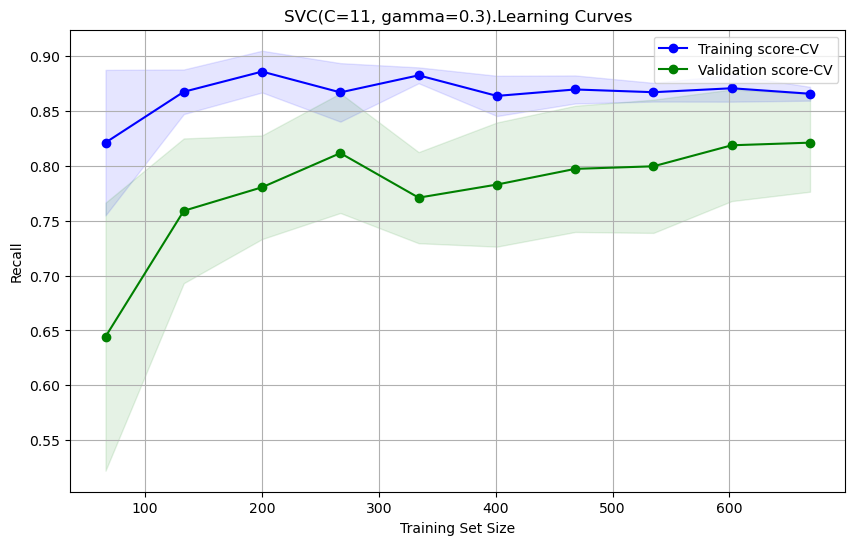

In [79]:
plot_learning_curves(best_SVM_RBF,X_train, y_train)

In [65]:
## using cross validation to find the best cost value in SVM with a quadratic polynomial kernel 
SVM_POLY_C = {}
cost_values = np.array([0.5, 1,2,3,4,5,6,7,8,9,10])
for cost in cost_values:
    models = {
        "SVM-POLY-C={}".format(cost): SVC(C=cost, kernel='poly', degree= 2)}
    for model_name, model in models.items():
        SVM_POLY_C[model_name] = cross_validation(model, X_train, y_train, 3)

In [66]:
SVM_POLY_C = pd.DataFrame.from_dict(SVM_POLY_C, orient='index', columns=['Recall'])

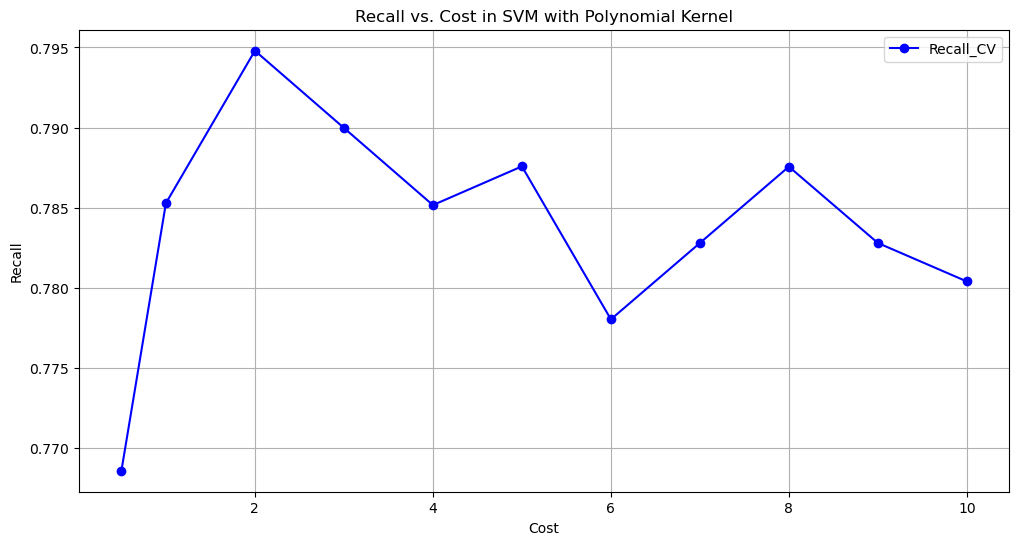

In [67]:
## plot the cross validation recall against cost in SVM with quadratic kernel 
plt.figure(figsize=(12, 6))
plt.plot(cost_values, SVM_POLY_C["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Cost')
plt.ylabel('Recall')
plt.title('Recall vs. Cost in SVM with Polynomial Kernel')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
## using cross validation to find the best degree value in SVM with a polynomial kernel 
SVM_POLY_D = {}
d_values = np.array([1,2,3,4,5,6,7,8])
for d in d_values:
    models = {
        "SVM-POLY-D={}".format(d): SVC(C=2, kernel='poly', degree=d)}
    for model_name, model in models.items():
        SVM_POLY_D[model_name] = cross_validation(model, X_train, y_train, 3)

In [69]:
SVM_POLY_D = pd.DataFrame.from_dict(SVM_POLY_D, orient='index', columns=['Recall'])

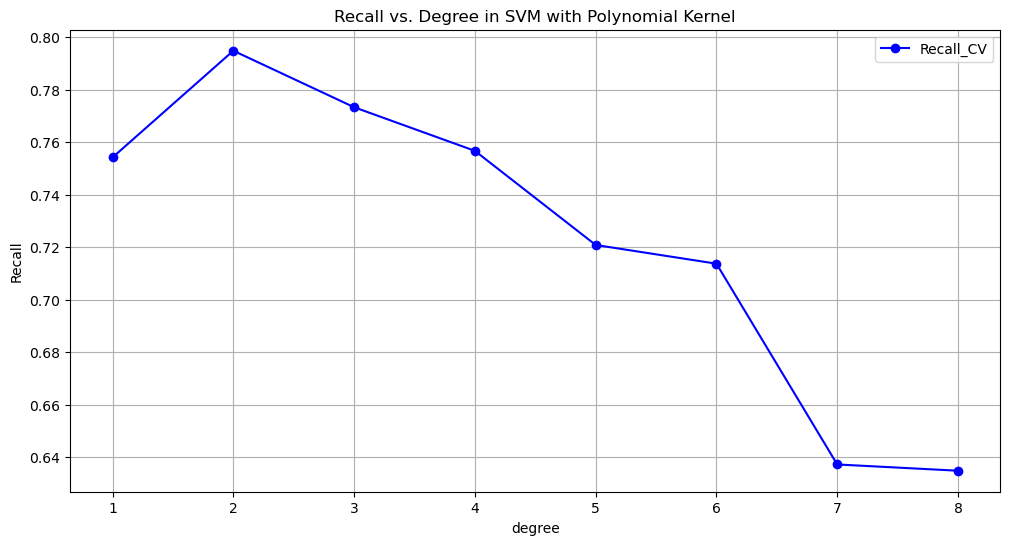

In [70]:
## plot the cross validation recall against the degree value in SVM with a polynomial kernel 
plt.figure(figsize=(12, 6))
plt.plot(d_values, SVM_POLY_D["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('degree')
plt.ylabel('Recall')
plt.title('Recall vs. Degree in SVM with Polynomial Kernel')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# fit the SVM model with the best degree value,cost value found through cross validation and calculate fit time
best_SVM_POLY = SVC(C=2, kernel='poly', degree=2)

start_time = time.time()
best_SVM_POLY.fit(X_train, y_train)
end_time = time.time() 
fit_time_SVM_POLY = end_time - start_time
print('SVM with polynomial kernel fit time: ', fit_time_SVM_POLY)

SVM with polynomial kernel fit time:  0.015179872512817383


In [72]:
# make predictions using SVM with polynomial kernel and calculate predict time  
start_time = time.time()
pred_SVM_POLY = best_SVM_POLY.predict(X_test)
end_time = time.time() 
predict_time_SVM_POLY = end_time - start_time
print('SVM with polynomial kernel predict time: ', predict_time_SVM_POLY)

SVM with polynomial kernel predict time:  0.003998994827270508


In [73]:
# calculate the recall 
SVM_POLY_recall = recall_score(y_test, pred_SVM_POLY)
SVM_POLY_recall

0.8044692737430168

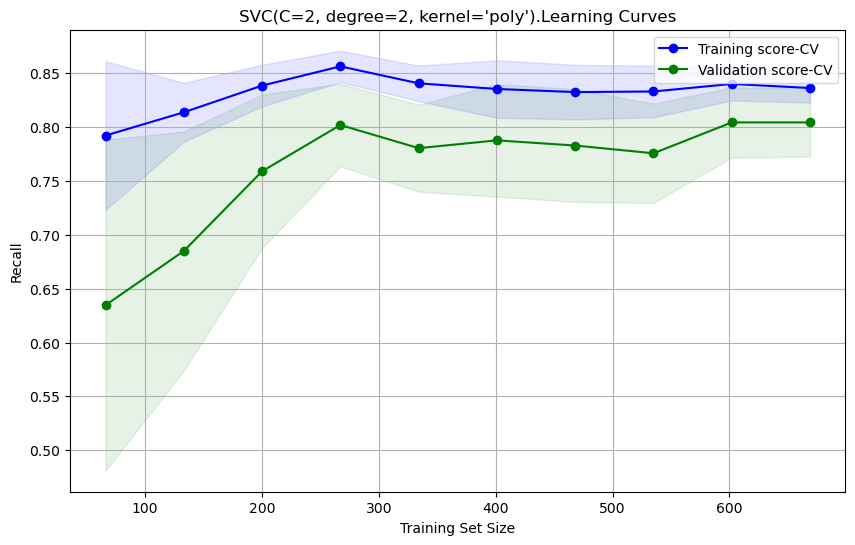

In [74]:
plot_learning_curves(best_SVM_POLY,X_train, y_train)

In [75]:
# Program End time
program_end_time = time.time()

# Calculate elapsed time for the whole program
elapsed_time = program_end_time - program_start_time

print(elapsed_time)

120.32165598869324
